  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Mobile Price Range Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is


## Data Definition:

Input variables:

**Independent Variable**

1. battery_power: Total energy a battery can store in one time measured in mAh

2. blue: Has bluetooth or not

3. clock_speed: speed at which microprocessor executes instructions

4. dual_sim: Has dual sim support or not

5. fc: Front Camera mega pixels

6. four_g: Has 4G or not

7. int_memory: Internal Memory in Gigabytes

8. m_dep: Mobile Depth in cm

9. mobile_wt: Weight of mobile phone

10. n_cores: Number of cores of processor

11. pc: Primary Camera mega pixels

12. px_height: Pixel Resolution Height

13. px_width: Pixel Resolution Width

14. ram: Random Access Memory in Mega Bytes

15. sc_h: Screen Height of mobile in cm

16. sc_w: Screen Width of mobile in cm

17. talk_time: longest time that a single battery charge will last when you are

18. three_g: Has 3G or not

19. touch_screen: Has touch screen or not

20. wifi: Has wifi or not

**Dependent Variable**

21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Data Manipulation](#Data_Manipulation)
    - 3.3 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.4 - [Statistical Summary](#Statistical_Summary)
4. **[EDA](#EDA)**    
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Bivariate Analysis](#Bivariate_Analysis)
    - 4.3 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.4 - [Conclusion of EDA](#Conclusion_of_EDA)
5. **[Label Encoding for categorical Variable](#Label_Encoding_for_categorical_Variable)**
6. **[Feature Selection](#feature_selection)**
7. **[Standardise Data](#Standardise_Data)**
8. **[ML Models](#ML_Models)**
    - 8.1 - [Naive Bayes](#Naive_Bayes) 
    
  

<a id='import_packages'></a>
## 1. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
# Set default setting of seaborn
sns.set()

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# read the data
raw_data = pd.read_csv(r"C:\Users\ASUS\Downloads\Mobile_price.csv")

# print the first five rows of the data
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data = raw_data.copy(deep=True)

#Make a copy of this object’s indices and data.
#When deep=True (default), a new object will be created with a copy of the calling object’s data and
#indices. Modifications to the data or indices of the copy will not be reflected in the original object
#When deep=False, a new object will be created without copying the calling object’s data or index
#(only references to the data and index are copied). Any changes to the data of the original will be
#reflected in the shallow copy (and vice versa)

<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Data Manipulation<br>
                        3. Check for missing values<br>
                        4. Study summary statistics<br> 
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [4]:
# get the shape
print(data.shape)

(2000, 21)


**We see the dataframe has 21 columns and 2000 observations**

In [5]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that all attributes are numerical, even the one which are
                        categorical are represented as numeric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Manipulation'></a>
## 3.2. Data Manipulation

**Manipulating data types**

In [6]:
data['n_cores'] = data['n_cores'].astype("object")
data['price_range'] = data['price_range'].astype("object")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Datatypes are updated**

<a id='Missing_Data_Treatment'></a>
## 3.3. Missing Data Treatment

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


There are no missing values present in the data.

<a id='Statistical_Summary'></a>
## 3.4. Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# data frame with numerical features
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# data frame with categorical features
data.describe(include='object')

,n_cores,price_range
count,2000,2000
unique,8,4
top,4,3
freq,274,500


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of the categorical variables i.e n_cores(no.of cores in the mobile), predited variable price_range and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='EDA'></a>
## 4. EDA

<a id='Univariate_Analysis'></a>
## 4.1. Univariate Analysis

**Exploring individual features**

4.1.1 Distribution of Battery Power

In [11]:
data.battery_power.describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

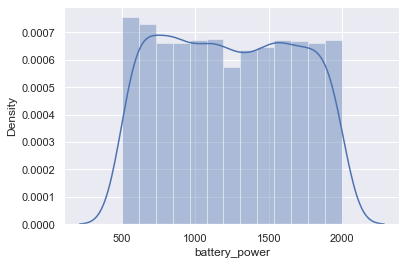

In [12]:
sns.distplot(data.battery_power)

**The above histogram shows that :**

* “battery power” attribute is almost symmetric in nature.
* Minimum and Maximum battery power is 500 and 2000 respectively.
* This dataset has fewer observations at the extreme values i.e minimum and maximum values
* This indicates that people mainly buy mobile phones having an average battery power.


4.1.2 Distribution of Bluetooth

In [13]:
data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


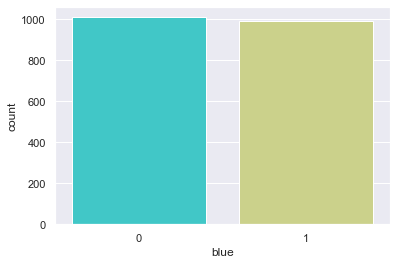

In [14]:
sns.countplot(data.blue,data=data,palette = "rainbow")
plt.show()


**This countplot of “Blue” shows that:**

* With the plot we can say that there are only two types of responses for “blue”, ‘0’ which indicates phone do not have bluetooth and ‘1’ indicating, it has bluetooth service.
* Both “0” and “1” are almost equal in proportion


4.1.3 Distribution of Clock Speed

In [15]:
data.clock_speed.describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

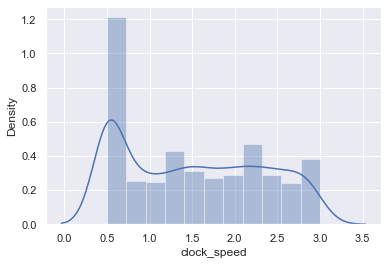

In [16]:
sns.distplot(data.clock_speed)

**The above histogram shows that :**

* The Clock Speed ranges from 0.5 to 3 and is numeric
* The dataset contain majority of phones having clock speed of “0.5”
* Other clock speed’s are almost same in quantity


4.1.4 Dual SIM

In [17]:
data.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


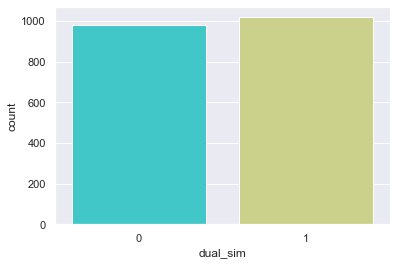

In [18]:
sns.countplot(data.dual_sim,data=data,palette = "rainbow")
plt.show()


**This countplot of “dual_sim” shows that:**

* Dual sim has two responses “0” (no) and 1 (“yes”)
* The feature is balanced, as they are almost equal in proportion


4.1.5 Front Camera Megapixels

In [19]:
data.fc.describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fc', ylabel='Density'>

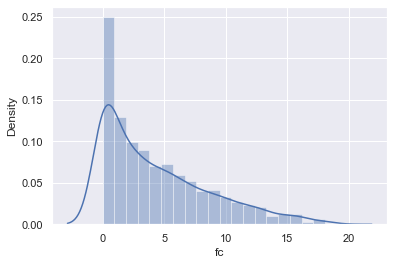

In [20]:
sns.distplot(data.fc)

In [21]:
data.fc[data.fc == 0].count()

474

**The above histogram shows that :**

* It shows that most of the “fc” values are centered on 0 and count decreases as fc increases.
* This explains that 474 phones in our data set do not have a front camera.
* The data is right skewed i.e it is not symmetric



Let's check skewness

In [22]:
data.fc.skew()

1.0198114105315519

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>Skew values discription : <br>
                        1. A skewness value of 0 in the output denotes a symmetrical distribution of values<br>
                        2. A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.<br>
                        3. A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

4.1.6 four_g

In [23]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


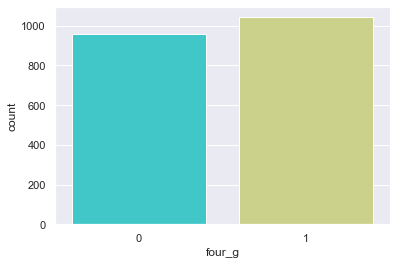

In [24]:
sns.countplot(data.four_g,data=data,palette = "rainbow")
plt.show()


**This countplot of “four_g” shows that:**

* There are 2 unique categories present in the four_g attribute, 0(“no”) and 1(“yes”).
* Most of the phones have four_g service i.e 52.15%
* There is no imbalance in the categories of four_g attribute.



4.1.7 int_memory

In [25]:
data.int_memory.describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_memory', ylabel='Density'>

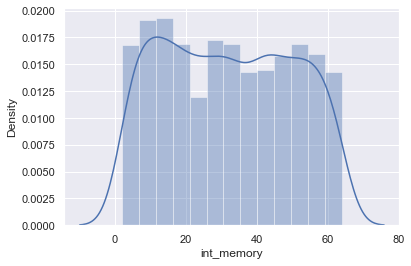

In [26]:
sns.distplot(data.int_memory)

**The above distribution shows that :**

* The internal memory ranges from 2 to 64 GB
* Also, the dataset have phone’s of different generation.i.e Older mobiles to latest one’s.


4.1.8 m_dep

In [27]:
data.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='m_dep', ylabel='Density'>

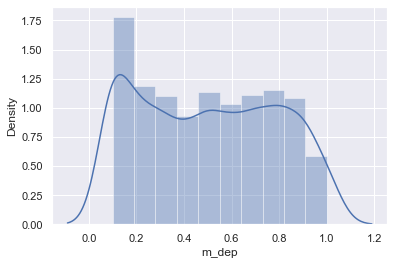

In [28]:
sns.distplot(data.m_dep)

**The above distribution shows that :**

* We can classify phones into three category based on m_dep into “low” , “mid” and “high”
* The attribute ranges from 0.1 cm to 1 cm


4.1.9 mobile_wt

In [29]:
data.mobile_wt.describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

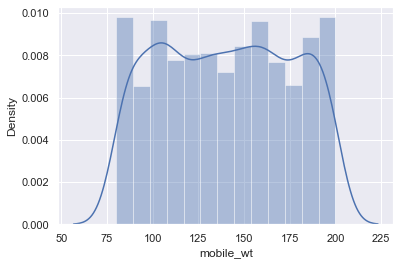

In [30]:
sns.distplot(data.mobile_wt)

**The above distribution shows that :**

* The mobile weight is distributed from 80 gm to 200 gm
* The extreme values have minimum count


4.1.10 n_cores

In [31]:
data.n_cores.value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


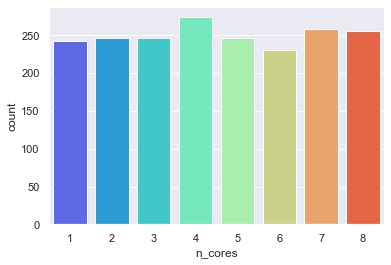

In [32]:
sns.countplot(data.n_cores,data=data,palette = "rainbow")
plt.show()


**This countplot of “n_cores” shows that:**

* There are 8 unique categories in the n_cores attribute.
* All this categories are almost equal in quantity except mobiles with 6 and 4 cores.



4.1.11 pc

In [33]:
data.pc.describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc', ylabel='Density'>

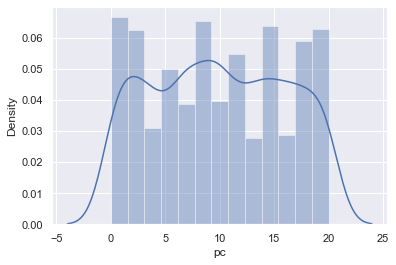

In [34]:
sns.distplot(data.pc)

**The above distribution shows that :**

* The pc feature ranges from 0 to 20
* The statistical summary explains that there are no outliers.
* The feature is not symmetric



4.1.12 px_height

In [35]:
data.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_height', ylabel='Density'>

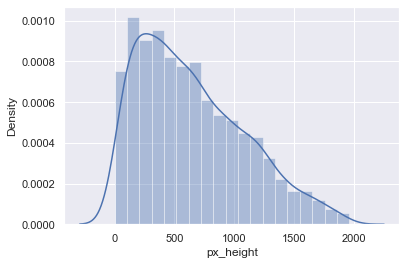

In [36]:
sns.distplot(data.px_height)

**The above distribution shows that :**

* Pixel resolution height ranges from 0 to 1960
* The feature is skewed to right i.e not symmetric.



4.1.13 px_width

In [37]:
data.px_width.describe()

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_width', ylabel='Density'>

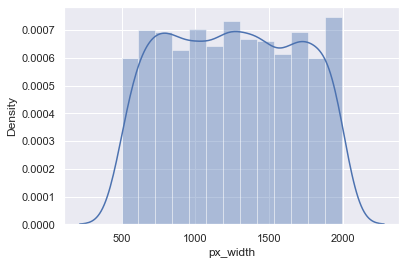

In [38]:
sns.distplot(data.px_width)

**The above distribution shows that :**

* The feature ranges from 500 to 1998
* Also data is concentrated towards the center



4.1.14 ram

In [39]:
data.ram.describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ram', ylabel='Density'>

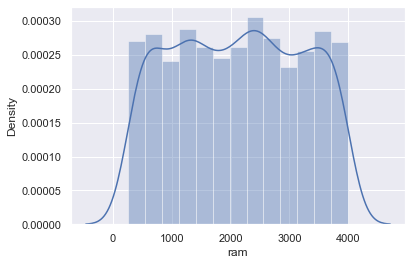

In [40]:
sns.distplot(data.ram)

**The above distribution shows that :**

* The attribute ranges from 256 MB to 3998 MB
* There extremes are less in quantity



4.1.15 sc_h

In [41]:
data.sc_h.describe()

count    2000.000000
mean       12.306500
std         4.213245
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc_h', ylabel='Density'>

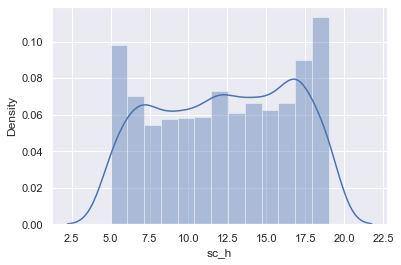

In [42]:
sns.distplot(data.sc_h)

**The above distribution shows that :**

* Majoirty of phones have screen height as 19.3 , 15.7 , 15.1 cm’s
* The feature ranges from 5 cm to 19 cm



4.1.16 sc_w

In [43]:
data.sc_w.describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc_w', ylabel='Density'>

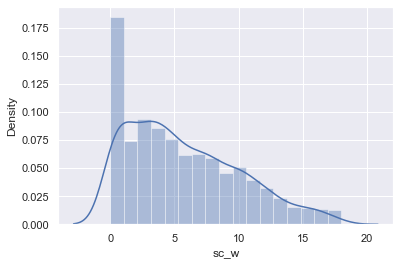

In [44]:
sns.distplot(data.sc_w)

**The above distribution shows that :**

* The attribute ranges from 0 cm to 18 cm
* The screen width of 0 is clearly a outlier



4.1.17 talk_time

In [45]:
data.talk_time.describe()

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='talk_time', ylabel='Density'>

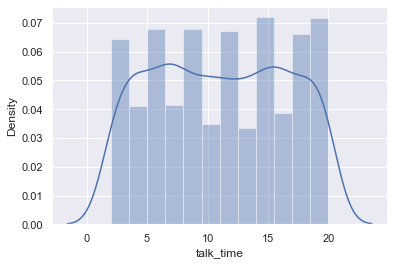

In [46]:
sns.distplot(data.talk_time)

**The above distribution shows that :**

* Majoirty of phones have talk time of 6 ,19,15,16,4,7 hours.
* The feature ranges from 2 hours to 19 hours



4.1.18 three_g

In [47]:
data.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


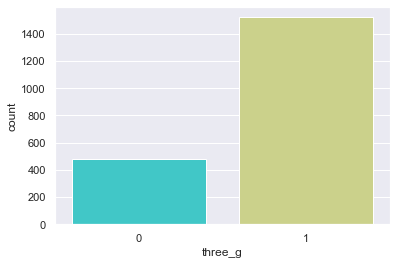

In [48]:
sns.countplot(data.three_g,data=data,palette = "rainbow")
plt.show()


**This barchart says that:**

* The attribute has two category 0 (no) and 1 (yes)
* Majority of the phones have 3G service.

4.1.19 touch_screen

In [49]:
data.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


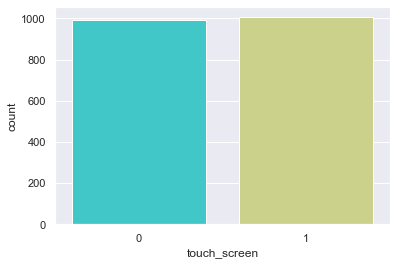

In [50]:
sns.countplot(data.touch_screen,data=data,palette = "rainbow")
plt.show()


**This countplot of “touch_screen” shows that:**

* The feature is balanced
* The dataset equally focuses on phones having touch screen or buttons


4.1.20 wifi

In [51]:
data.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


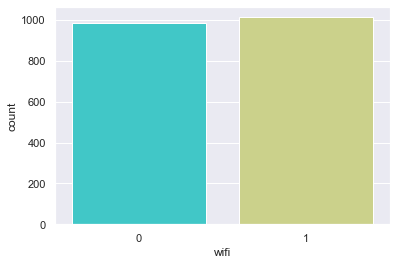

In [52]:
sns.countplot(data.wifi,data=data,palette = "rainbow")
plt.show()


**This countplot of “wifi” shows that:**

* The attribute has two category 0 (no) and 1 (yes)
* The feature is balanced


4.1.21 price_range

In [53]:
data.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


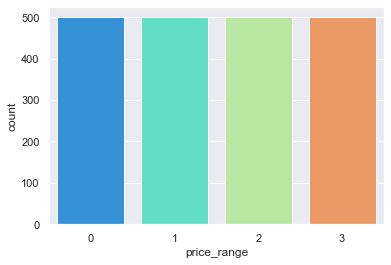

In [54]:
sns.countplot(data.price_range,data=data,palette = "rainbow")
plt.show()


**Dependent variable is uniformly distributed**

<a id='Bivariate_Analysis'></a>
## 4.2. Bivariate Analysis

4.2.1 Battery power

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

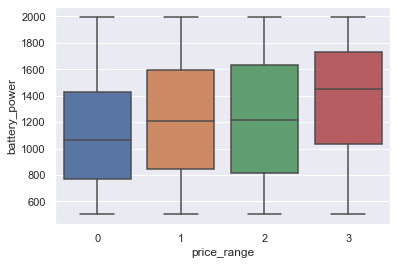

In [55]:
sns.boxplot(y = data.battery_power , x = data.price_range )

4.2.2 blue

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

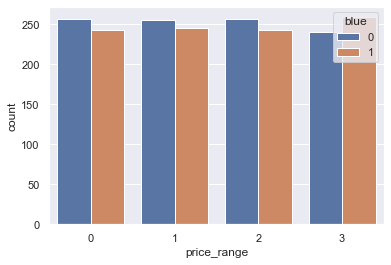

In [56]:
sns.countplot(data.price_range,hue=data.blue)

**Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service**

4.2.3 clock_speed

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

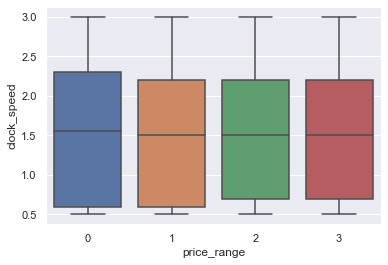

In [57]:
sns.boxplot(y = data.clock_speed , x = data.price_range )

4.2.4 dual_sim

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

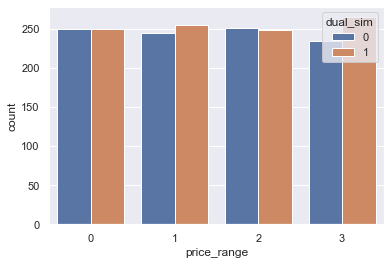

In [58]:
sns.countplot(data.price_range,hue=data.dual_sim)

**Majority of phones have dual sim service.**

4.2.5 fc

<AxesSubplot:xlabel='price_range', ylabel='fc'>

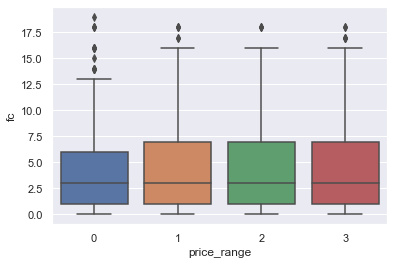

In [59]:
sns.boxplot(y = data.fc , x = data.price_range )

**There are few outliers in fc**

4.2.6 four_g

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

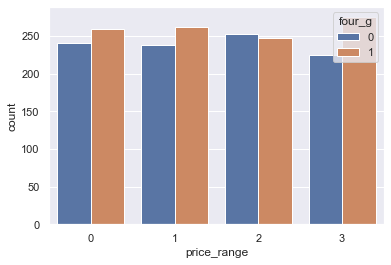

In [60]:
sns.countplot(data.price_range,hue=data.four_g)

**Majority of phones of only price range 2 dont have 4G service.**

4.2.7 int_memory

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

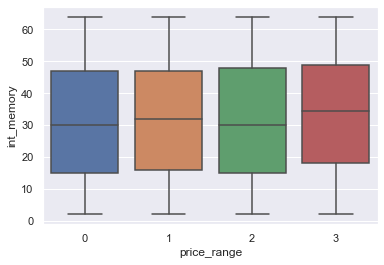

In [61]:
sns.boxplot(y = data.int_memory , x = data.price_range )

4.2.8 m_dep

<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

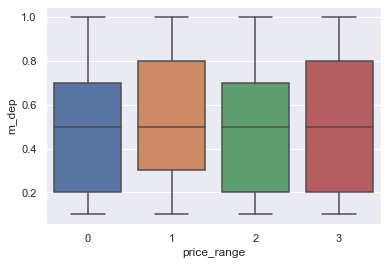

In [62]:
sns.boxplot(y = data.m_dep , x = data.price_range )

4.2.9 mobile_wt

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

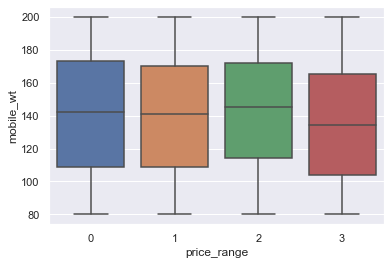

In [63]:
sns.boxplot(y = data.mobile_wt , x = data.price_range )

4.2.10 n_cores


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

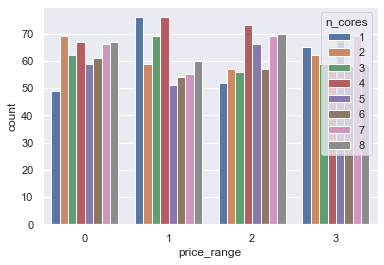

In [64]:
sns.countplot(data.price_range,hue=data.n_cores)

* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

4.2.11 pc

<AxesSubplot:xlabel='price_range', ylabel='pc'>

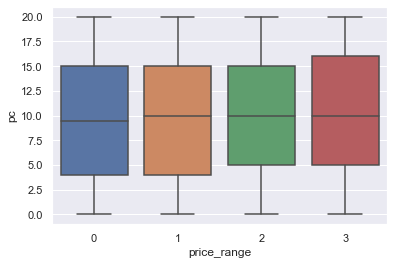

In [65]:
sns.boxplot(y = data.pc , x = data.price_range )

4.2.12 px_height

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

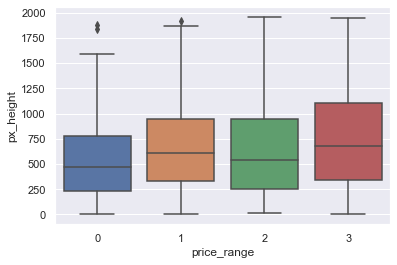

In [66]:
sns.boxplot(y = data.px_height , x = data.price_range )

4.2.13 px_width

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

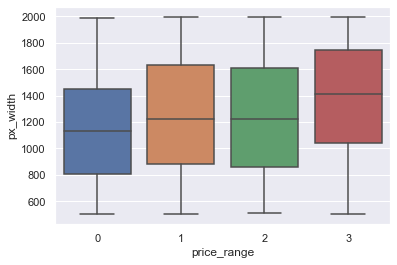

In [67]:
sns.boxplot(y = data.px_width , x = data.price_range )

4.2.14 Ram

<AxesSubplot:xlabel='price_range', ylabel='ram'>

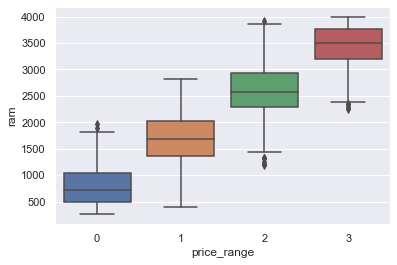

In [68]:
sns.boxplot(y = data.ram , x = data.price_range )

**There are few outliers**

4.2.15 sc_h

<AxesSubplot:xlabel='price_range', ylabel='sc_h'>

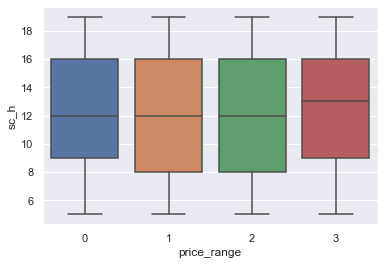

In [69]:
sns.boxplot(y = data.sc_h , x = data.price_range )

4.2.16 sc_w

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

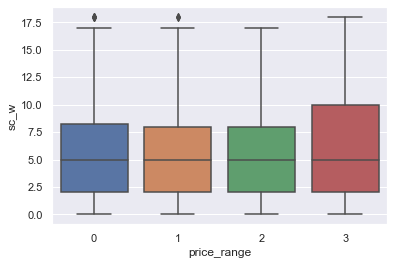

In [70]:
sns.boxplot(y = data.sc_w , x = data.price_range )

4.2.17 talktime

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

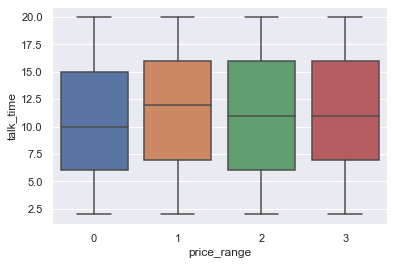

In [71]:
sns.boxplot(y = data.talk_time , x = data.price_range )

4.2.18 three_g

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

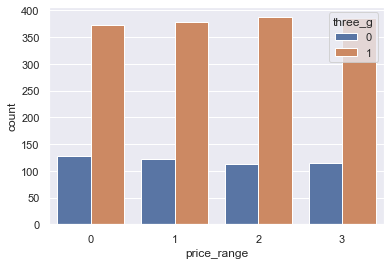

In [72]:
sns.countplot(data.price_range,hue=data.three_g)

**Majority of phones irrespective of price range have 3G service**

4.2.19 touch_screen

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

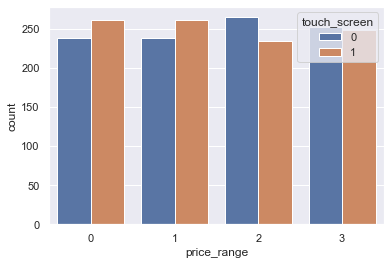

In [73]:
sns.countplot(data.price_range,hue=data.touch_screen)

**From countplot we can conclude that :**

* Phones of price range 0 and 1 have majority of touch screen service.
* Majority of phones of price range 2 and 3 do not have touch screen service.



4.2.20 wifi

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

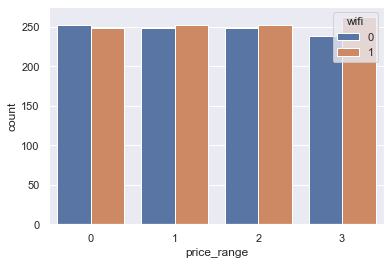

In [74]:
sns.countplot(data.price_range,hue=data.wifi)

**Wifi service is almost unbiased.**

<a id='Multivariate_Analysis'></a>
## 4.3. Multivariate Analysis

4.3.1 Correlation among the features

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# check correlation
data_num = data.copy(deep = True)
data_num.price_range = data.price_range.astype("int64")
corr = data_num.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
pc,0.031441,-0.009952,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599


<AxesSubplot:>

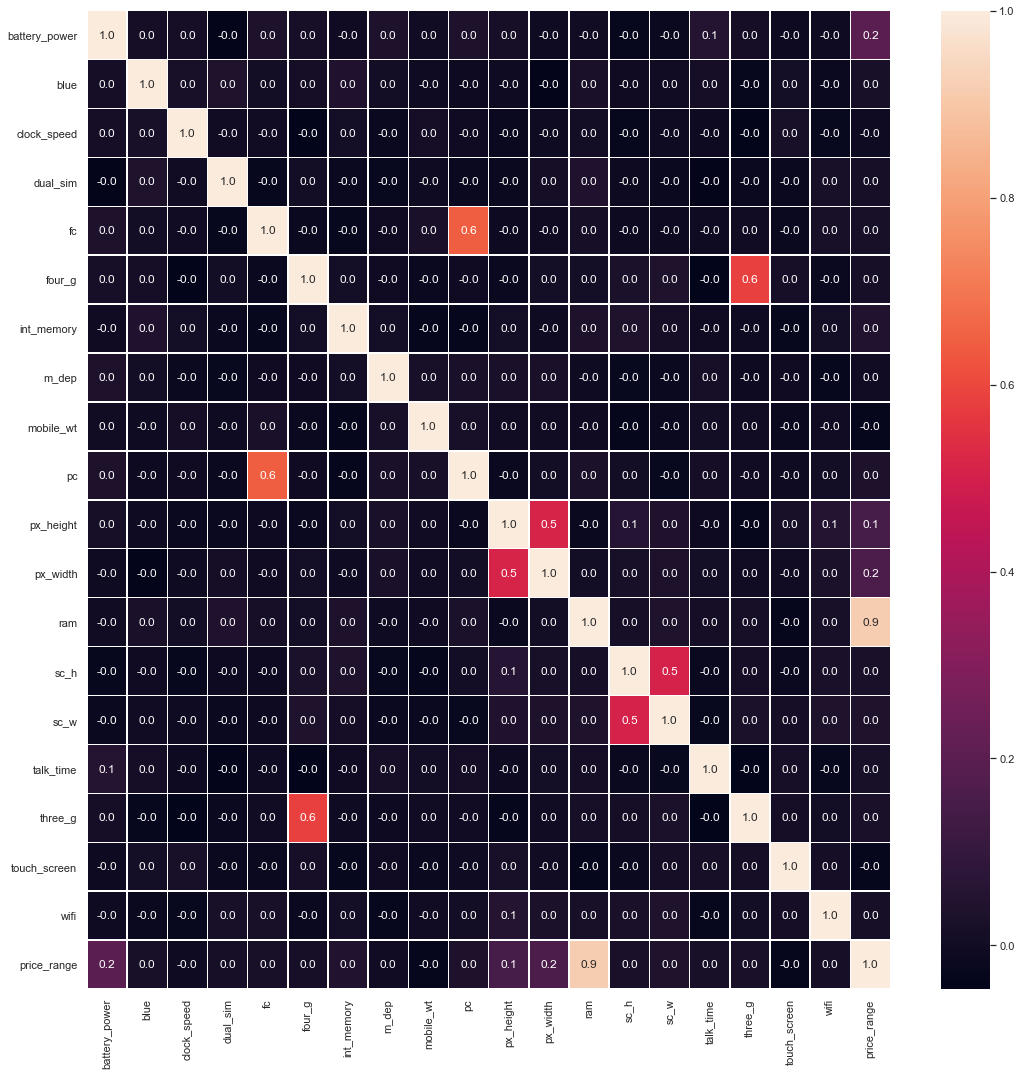

In [76]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

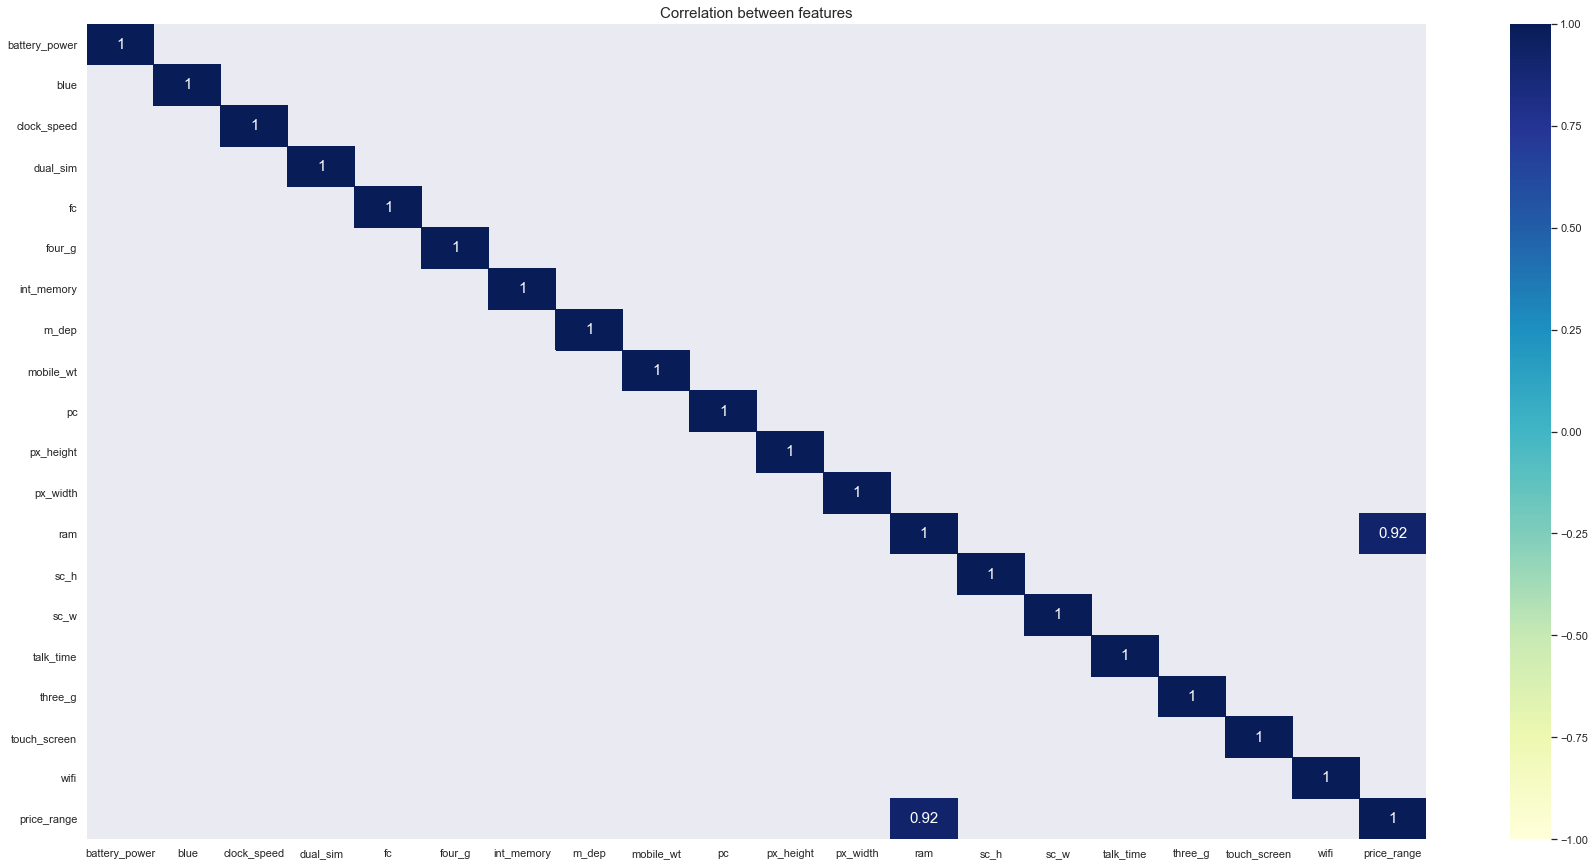

In [77]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title('Correlation between features', fontsize=15)
plt.show()

**Conclusion from heatmap :**

* As we can see our target price range has highly positive correlation between ram.
* Below features have highly positive correlation
    * 3G and 4G
    * pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
    * px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
    * sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

<a id='Conclusion_of_EDA'></a>
## 4.4 Conclusion of EDA

**Feature Removal:**

pc(Primary Camera mega pixels) and fc(Front Camera mega pixels) are highly correlated

**Outliers Summary:**

* fc
* px_height
* ram
* sc_w

**Note : we will not remove outliers are they are outliers for individual price range, so ignoring them**


<a id='Label_Encoding_for_categorical_Variable'></a>
## 5. Label Encoding for categorical Variable

In [78]:
data_with_dummies = pd.get_dummies(data.drop(['price_range'],axis = 1),drop_first=True)
data_with_dummies['price_range'] = data.price_range
data_with_dummies.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,...,touch_screen,wifi,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,0,0,0,0,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,...,1,0,0,1,0,0,0,0,0,2
2,563,1,0.5,1,2,1,41,0.9,145,6,...,1,0,0,0,0,1,0,0,0,2
3,615,1,2.5,0,0,0,10,0.8,131,9,...,0,0,0,0,0,0,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,...,1,0,1,0,0,0,0,0,0,1


<a id='feature_selection'></a>
## 6. Feature Selection

In [80]:
# Split the data into 40% test and 60% training
X = data_with_dummies.drop(['price_range'],axis = 1)
y = data_with_dummies['price_range'].astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [81]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

#n_estimators:int, default=100
#The number of trees in the forest
#n_jobs:int, default=None
#The number of jobs to run in parallel. None means 1.-1 means using all processors

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [82]:
feat_labels = X.columns.values
# Print the name and gini importance of each feature
feature_importance = []
for feature in zip(feat_labels, clf.feature_importances_):
    #Print(feature)
    feature_importance.append(feature)

In [83]:
feature_importance

[('battery_power', 0.0730113213179674),
 ('blue', 0.007150916192744889),
 ('clock_speed', 0.03048637234921058),
 ('dual_sim', 0.007392264304935999),
 ('fc', 0.02639608657838677),
 ('four_g', 0.007052664238039364),
 ('int_memory', 0.038623145089789285),
 ('m_dep', 0.026200046186189704),
 ('mobile_wt', 0.04023719324521942),
 ('pc', 0.03049523815809361),
 ('px_height', 0.0560257790192659),
 ('px_width', 0.05782916621719407),
 ('ram', 0.4540134267394779),
 ('sc_h', 0.02829464366557861),
 ('sc_w', 0.029816911073998746),
 ('talk_time', 0.03171469684472826),
 ('three_g', 0.006074229519184142),
 ('touch_screen', 0.007461133837727775),
 ('wifi', 0.00706799895521867),
 ('n_cores_2', 0.004909393941144302),
 ('n_cores_3', 0.004476150341641833),
 ('n_cores_4', 0.005079281991455894),
 ('n_cores_5', 0.005492309013950315),
 ('n_cores_6', 0.004700540339039541),
 ('n_cores_7', 0.005033145815871609),
 ('n_cores_8', 0.004965945023945239)]

In [84]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
sfm = SelectFromModel(clf, threshold=0.01)

In [85]:
# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [86]:
selected_features = []
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [87]:
selected_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [88]:
data_selected = data_with_dummies[selected_features]
data_selected.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15


<a id="Standardise_Data"> </a>
## 7. Standardise Data

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
scaler.fit(data_selected)

MinMaxScaler()

In [92]:
data_standardised = scaler.fit_transform(data_selected)

**split data into train and test**

In [93]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X = data_standardised
y = data_with_dummies['price_range'].astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (1400, 13)
X_test  (600, 13)
y_train  (1400,)
y_test  (600,)


<a id="ML_Models"> </a>
## 8. ML Models

<a id="Naive_Bayes"> </a>
## 8.1 Naive Bayes

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a ensemble model using Naive Bayes. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  ensemble model using Naive Bayes, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
# build the model
gnb = GaussianNB()

# define the ovr strategy
GNB = OneVsRestClassifier(gnb)

#One-vs-the-rest (OvR) multiclass strategy
#This is the most commonly used strategy for multiclass classification

# fit the model
GNB.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

**2. Predict the values**

In [95]:
# predict the values
y_pred_GNB = GNB.predict(X_test)

**3. Compute accuracy measures**

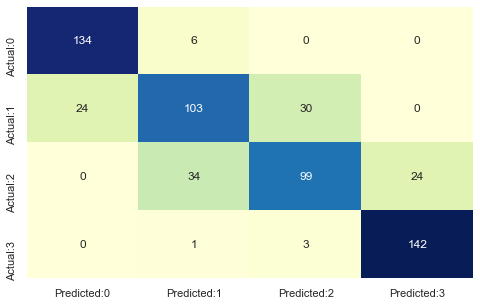

In [96]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                           index=['Actual:0','Actual:1','Actual:2','Actual:3'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a color bar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [97]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_GNB)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       140
           1       0.72      0.66      0.68       157
           2       0.75      0.63      0.69       157
           3       0.86      0.97      0.91       146

    accuracy                           0.80       600
   macro avg       0.79      0.80      0.79       600
weighted avg       0.79      0.80      0.79       600



**4. Tabulate the results**

In [98]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Naive_bayes = pd.Series({'Model': "Naive Bayes",
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB,average="macro"),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB ,average="macro"),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),
                  'f1-score':metrics.f1_score(y_test, y_pred_GNB,average = "macro")})

# Macro average Scores - It is the simple mean of scores of all the classes i.e. 0, 1, 2, 3 in this
# case for recall, precision and f1 etc. 

# appending our result table
result_tabulation = result_tabulation.append(Naive_bayes , ignore_index = True)

# view the result table
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.7922,0.804092,0.796667,0.794773


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the above result that accuracy measures for the Naive Bayes is 79.66 %</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Project End Here